In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from collections import Counter
import networkx as nx
import community
from itertools import permutations 

import sys
sys.path.append("../../../LocalGraphClustering/")
import localgraphclustering as lgc

# Drawing function

In [26]:
def draw_plot_multiple_class(figname,coords,labels,true_labels,nodesize=15,figsize=2.5):
    # selected_color = [(127/255,201/255,127/255),
    #                   (190/255,174/255,212/255),
    #                   (253/255,192/255,134/255),
    #                   (255/255,255/255,153/255),
    #                   (56/255,108/255,176/255)]
    selected_color = [(102/255,166/255,30/255),
                      (217/255,95/255,2/255),
                      (117/255,112/255,179/255),
                      (231/255,41/255,138/255),
                      (27/255,158/255,119/255)]
    num_errors = float("inf")
    best_mapping = None
    for mapping in permutations(range(len(set(labels))),len(set(true_labels))):
        colors = np.zeros(len(true_labels),dtype=np.int32)
        for i in range(len(colors)):
            colors[i] = mapping[labels[i]]
        if np.sum(colors!=true_labels) < num_errors:
            num_errors = np.sum(colors!=true_labels)
            best_mapping = colors
    print("There are",num_errors,"errors.")
    withinalpha=0.6
    betweenalpha=0.1
    drawing = G.draw(coords,figsize=(figsize,figsize),
                     nodecolor=[selected_color[i] for i in best_mapping],
                     nodesize=nodesize,edgealpha=betweenalpha)   

    for edge in drawing.edge_mapping.keys():
        if labels[edge[0]] == labels[edge[1]]:
            drawing.edgecolor(edge[0],edge[1],alpha=withinalpha)
        else:
            drawing.edgecolor(edge[0],edge[1],alpha=betweenalpha)
    drawing.nodewidth(range(len(labels)),0.5)        
    drawing.nodecolor(range(len(labels)),edgecolor='w')
    for i in range(len(labels)):
        if best_mapping[i] != true_labels[i]:
            disk = plt.Circle(coords[i], radius=0.05, color='#cc0000', fill=False, zorder=5)
            drawing.ax.add_artist(disk)
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.autoscale(enable=True, axis='y', tight=True)
    plt.xlim(np.min(coords)-0.025,np.max(coords)+0.025)
    plt.ylim(np.min(coords)-0.025,np.max(coords)+0.025)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.gcf().savefig(figname+".pdf",bbox_inches='tight',pad_inches=0,transparent=True)
    plt.gcf().savefig(figname+".png",bbox_inches='tight',pad_inches=0,transparent=True,dpi=600)
    plt.show()

def draw_plot_single_class(figname,coords,labels,seeds,use_bfs=True,flowmethod="mqi",nodesize=15,figsize=2.5):
    if use_bfs:
        neigh = np.nonzero(np.asarray(np.sum(G.adjacency_matrix[seeds,:],0))[0])[0]
        seeds = list(set(seeds).union(neigh))
    flow_output = lgc.flow_clustering(G,seeds,method=flowmethod,delta=0.1)[0]
    # selected_color = [(127/255,201/255,127/255),
    #                   (190/255,174/255,212/255),
    #                   (253/255,192/255,134/255),
    #                   (255/255,255/255,153/255),
    #                   (56/255,108/255,176/255)]
    selected_color = [(102/255,166/255,30/255),
                      (217/255,95/255,2/255),
                      (117/255,112/255,179/255),
                      (231/255,41/255,138/255),
                      (27/255,158/255,119/255)]
    withinalpha=0.6
    betweenalpha=0.1
    seeds_set = set(seeds)
    output_set = set(flow_output)
    drawing = G.draw(coords,figsize=(figsize,figsize),
                 nodealpha=0,
                 nodesize=nodesize,edgealpha=betweenalpha)   
    drawing.nodecolor(seeds,c="#8da0cb",alpha=1)
    for edge in drawing.edge_mapping.keys():
        if (edge[0] in seeds_set) and (edge[1] in seeds_set):
            drawing.edgecolor(edge[0],edge[1],alpha=withinalpha)
        else:
            drawing.edgecolor(edge[0],edge[1],alpha=betweenalpha)
    drawing.nodewidth(range(len(labels)),0.5)        
    drawing.nodecolor(range(len(labels)),edgecolor='w')
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.autoscale(enable=True, axis='y', tight=True)
    plt.xlim(np.min(coords)-0.025,np.max(coords)+0.025)
    plt.ylim(np.min(coords)-0.025,np.max(coords)+0.025)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.gcf().savefig(figname+"-input.pdf",bbox_inches='tight',pad_inches=0,transparent=True)
    plt.gcf().savefig(figname+"-input.png",bbox_inches='tight',pad_inches=0,transparent=True,dpi=600)
    plt.show()
    
    drawing = G.draw(coords,figsize=(figsize,figsize),
                 nodealpha=0,
                 nodesize=nodesize,edgealpha=betweenalpha)   
    drawing.nodecolor(flow_output,c="#8da0cb",alpha=1)
    for edge in drawing.edge_mapping.keys():
        if (edge[0] in output_set) and (edge[1] in output_set):
            drawing.edgecolor(edge[0],edge[1],alpha=withinalpha)
        else:
            drawing.edgecolor(edge[0],edge[1],alpha=betweenalpha)
    drawing.nodewidth(range(len(labels)),0.5)        
    drawing.nodecolor(range(len(labels)),edgecolor='w')
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.autoscale(enable=True, axis='y', tight=True)
    plt.xlim(np.min(coords)-0.025,np.max(coords)+0.025)
    plt.ylim(np.min(coords)-0.025,np.max(coords)+0.025)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.gcf().savefig(figname+"-output.pdf",bbox_inches='tight',pad_inches=0,transparent=True)
    plt.gcf().savefig(figname+"-output.png",bbox_inches='tight',pad_inches=0,transparent=True,dpi=600)
    plt.show()

# Making a SBM graph

In [27]:
p,q = 0.3,0.0151
ncls = 5
cls_size = 20
npts = np.random.choice(range(cls_size,cls_size+1),ncls)
nnodes = np.sum(npts)
labels = np.zeros(nnodes,dtype="int32")
si = 0
for i in range(ncls):
    labels[si:(si+npts[i])] = i
    si += npts[i]

ei,ej = [],[]
np.random.seed(13170)
rands = np.random.rand(nnodes,nnodes)
for i in range(nnodes):
    for j in range(i+1,nnodes):
        if labels[i] == labels[j] and rands[i,j] < p:
            ei.append(i)
            ej.append(j)
        if labels[i] != labels[j] and rands[i,j] < q:
            ei.append(i)
            ej.append(j)
G = lgc.GraphLocal()
G.list_to_gl(ei,ej,[1.0]*len(ei))

# Computing graph layout

In [28]:
cls_center_loc = [(10*np.cos((i*1.0/ncls)*(2*np.pi)-(54/180)*(np.pi)),10*np.sin((i*1.0/ncls)*(2*np.pi)-(54/180)*(np.pi))) for i in range(ncls)]
init_coords = []
for k in range(ncls):
    npts_curr = npts[k]
    init_coords += [(cls_center_loc[k][0]+2*np.cos((i*1.0/npts_curr)*(2*np.pi)),cls_center_loc[k][1]+2*np.sin((i*1.0/npts_curr)*(2*np.pi))) for i in range(npts_curr)]
init_coords = {i:init_coords[i] for i in range(nnodes)}
nxG = nx.Graph()
nxG.add_nodes_from(range(nnodes))
nxG.add_edges_from(zip(ei,ej))
coords = nx.spring_layout(nxG,pos=init_coords,iterations=3,seed=0)
coords = [coords[i] for i in range(nnodes)]

# Visualizing the graph

There are 0 errors.


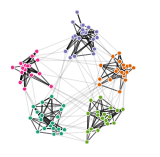

In [29]:
draw_plot_multiple_class("sbm-example",coords,labels,labels)

# Running Louvian's method

In [30]:
partition = community.best_partition(nxG,randomize=False)
louvian_colors = [partition[i] for i in range(nnodes)]
louvian_colors = np.array(louvian_colors)

There are 7 errors.


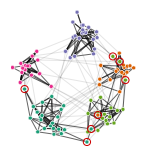

In [31]:
draw_plot_multiple_class("sbm-example-louvian",coords,louvian_colors,labels)

# Running MQI method

In [32]:
mqi_colors = np.zeros(nnodes,dtype="int32")-1
for cls in Counter(louvian_colors).most_common(ncls):
    i = cls[0]
    seeds = np.nonzero(louvian_colors==i)[0]
    neigh = np.nonzero(np.asarray(np.sum(G.adjacency_matrix[seeds,:],0))[0])[0]
    seeds = list(set(seeds).union(neigh))
    flow_output = lgc.flow_clustering(G,seeds,method="mqi")[0]
    for k in flow_output:
        if mqi_colors[k] >= 0:
            mqi_colors[k] = -2
        elif mqi_colors[k] == -1:
            mqi_colors[k] = i

There are 0 errors.


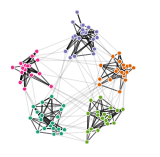

In [33]:
draw_plot_multiple_class("sbm-example-mqi",coords,mqi_colors,labels)

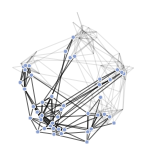

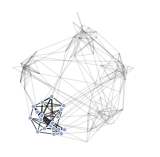

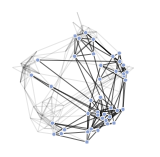

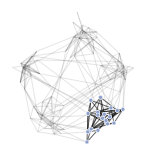

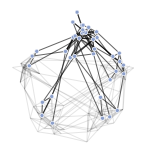

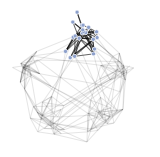

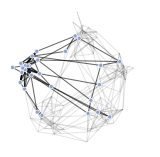

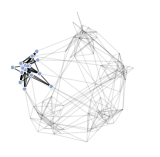

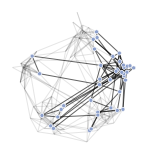

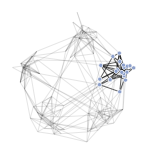

In [34]:
for cls in Counter(louvian_colors).most_common(ncls):
    i = cls[0]
    seeds = np.nonzero(louvian_colors==i)[0]
    draw_plot_single_class("sbm-mqi-"+str(i),coords,labels,seeds,flowmethod="mqi",use_bfs=True)

# Running SimpleLocal

In [35]:
sl_colors = np.zeros(nnodes,dtype="int32")-1
for cls in Counter(louvian_colors).most_common(ncls):
    i = cls[0]
    seeds = np.nonzero(louvian_colors==i)[0]
    flow_output = lgc.flow_clustering(G,seeds,method="sl",delta=0.1)[0]
    for k in flow_output:
        if sl_colors[k] >= 0:
            sl_colors[k] = -2
        elif sl_colors[k] == -1:
            sl_colors[k] = i

There are 0 errors.


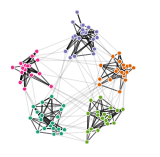

In [36]:
draw_plot_multiple_class("sbm-example-sl",coords,sl_colors,labels)

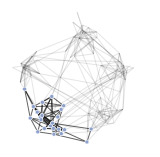

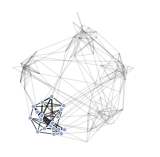

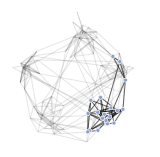

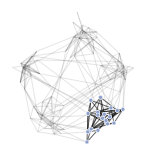

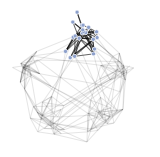

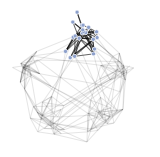

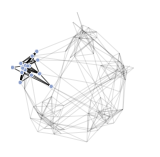

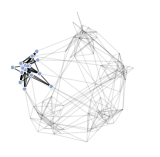

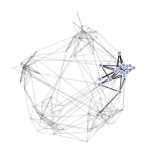

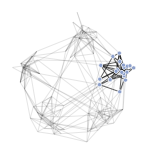

In [37]:
for cls in Counter(louvian_colors).most_common(ncls):
    i = cls[0]
    seeds = np.nonzero(louvian_colors==i)[0]
    draw_plot_single_class("sbm-sl-"+str(i),coords,labels,seeds,flowmethod="sl",use_bfs=False)